In [13]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('Daily_minimum_temps.csv', header=0)

In [15]:
def create_lagged_features(df, max_lag=20):
    df_new = pd.DataFrame()
    dados = df.iloc[:, 1].values
    tam = len(dados)

    for i in range(tam - max_lag):
        row_data = {}
        for j in range(max_lag + 1):
            row_data[f'x-{max_lag - j}'] = dados[i + j]
        df_new_row = pd.DataFrame([row_data])
        df_new = pd.concat([df_new, df_new_row], ignore_index=True)

    y = df_new[['x-0']]
    x = df_new.drop('x-0', axis=1)

    return df_new, x, y

df_new, x, y = create_lagged_features(df, max_lag=7)

In [16]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=False)
y_test = y_test.ravel()

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Desejado,Estimado
0,0.653992,0.617134
1,0.247148,0.371471
2,0.292776,0.448266
3,0.566540,0.492549
4,0.596958,0.424858
5,0.296578,0.298224
6,0.391635,0.321496
7,0.114068,0.306675
8,0.262357,0.395569
9,0.437262,0.381158


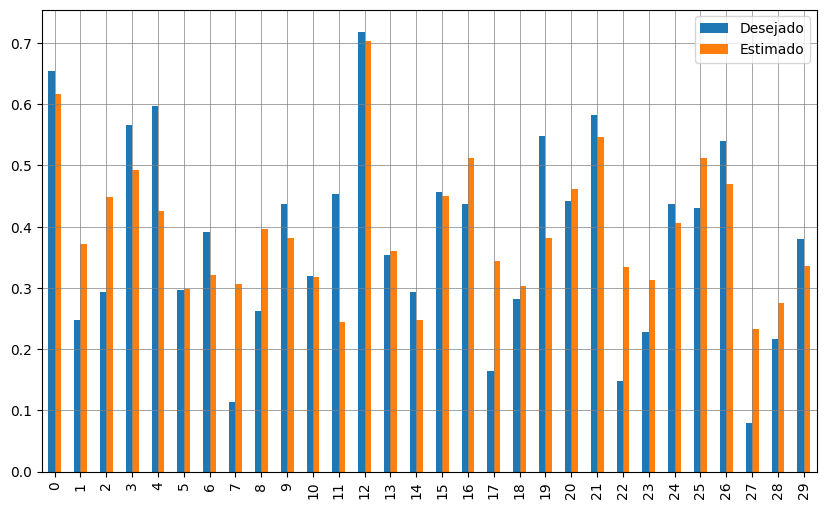

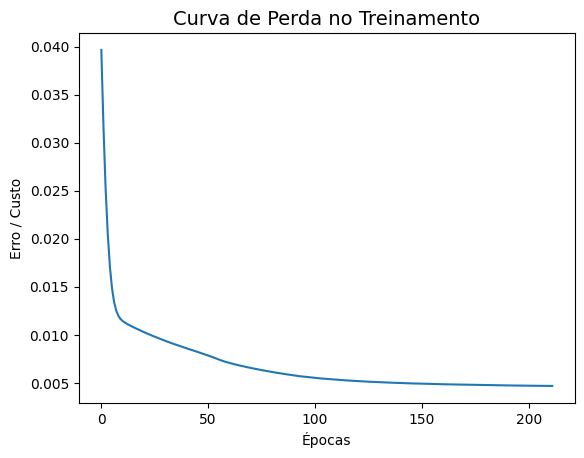

Epochs:  212
Loss:  0.004677601732155771
Mean Absolute Error (MAE):  0.07433373197924775
Mean Square Error (MSE):  0.009087222717542242
Root Mean Squared Error (RMSE):  0.009087222717542242
R2 Score:  0.6463494523791555


In [17]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', alpha=1e-2,
                       max_iter=5000, tol=1e-8, early_stopping=True, epsilon=1e-8,
                       learning_rate_init=0.0001, learning_rate='adaptive', random_state=None)

mlp_reg.fit(x_train, y_train)

y_predict = mlp_reg.predict(x_test)

df_temp = pd.DataFrame({'Desejado': y_test, 'Estimado': y_predict})
display(df_temp.head(15))
df_temp = df_temp.head(30)
df_temp.plot(kind='bar', figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show()

plt.plot(mlp_reg.loss_curve_)
plt.title('Curva de Perda no Treinamento', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Erro / Custo')
plt.show()

print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Square Error (MSE): ', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_test, y_predict))
print('R2 Score: ', metrics.r2_score(y_test, y_predict))

In [18]:
mlp_reg_cv = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', alpha=1e-2,
                       max_iter=5000, tol=1e-8, early_stopping=True, epsilon=1e-8,
                       learning_rate_init=0.0001, learning_rate='adaptive', random_state=None)

scores = cross_val_score(mlp_reg_cv, x, y, cv=5)

print("Scores: {}".format(scores))
print("Score Mean: {}".format(np.mean(scores)))

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/skle

Scores: [0.67193455 0.60581076 0.61940671 0.57067473 0.70251398]
Score Mean: 0.6340681462729341
